<a href="https://colab.research.google.com/github/koreabao/public_data/blob/main/%EC%A0%95%ED%99%95%EB%8F%842.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# google drive 권한 부여하기
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
import pandas as pd        
gtp=pd.read_csv('/content/drive/MyDrive/gtp_1.csv')

pf = gtp.iloc[:,2:4]
pf.columns=['ds','y']
pf['ds']=pd.to_datetime(pf['ds'])
pf=pf.dropna()
pf

,ds,y
0,1907-10-01,13.9
1,1907-11-01,5.3
2,1907-12-01,-3.9
3,1908-01-01,-3.5
4,1908-02-01,-4.0
...,...,...
1340,2020-08-01,26.5
1341,2020-09-01,21.4
1342,2020-10-01,14.3
1343,2020-11-01,8.0


In [17]:
from fbprophet import Prophet                
model = Prophet()  

In [18]:
pf_train = pf[:-12]    
pf_test = pf[-12:]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


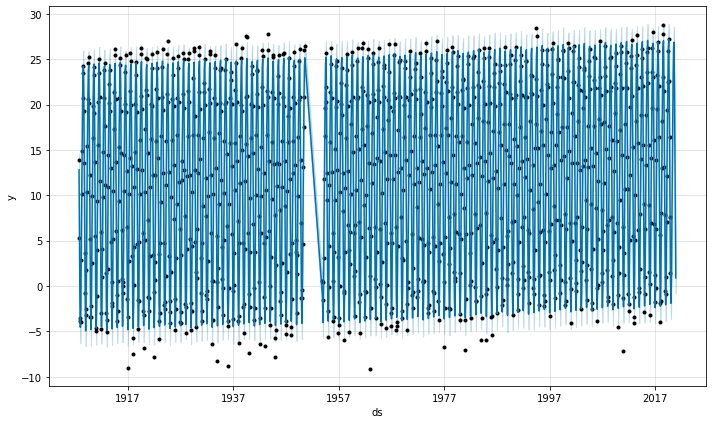

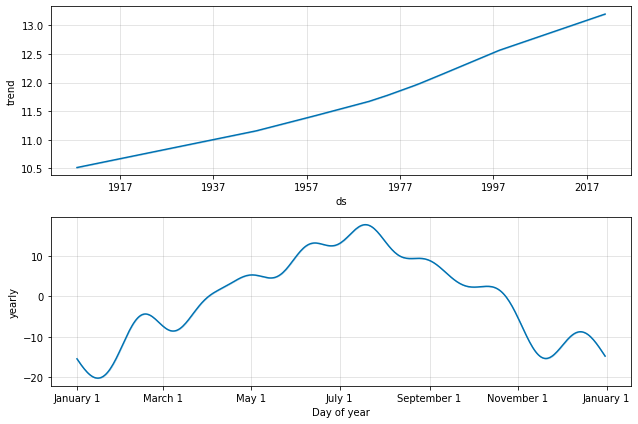

In [19]:
model.fit(pf_train)
term=model.make_future_dataframe(periods=12, freq='MS')  
prediction=model.predict(term)
model.plot(prediction)    
model.plot_components(prediction);

In [21]:
prediction.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1308,2020-01-01,13.172724,-3.672223,-0.136066,13.172724,13.172724,-15.075798,-15.075798,-15.075798,-15.075798,-15.075798,-15.075798,0.0,0.0,0.0,-1.903075
1309,2020-02-01,13.175096,-1.461024,2.099890,13.175096,13.175096,-12.945838,-12.945838,-12.945838,-12.945838,-12.945838,-12.945838,0.0,0.0,0.0,0.229259
1310,2020-03-01,13.177316,4.096894,7.445232,13.177316,13.177316,-7.376839,-7.376839,-7.376839,-7.376839,-7.376839,-7.376839,0.0,0.0,0.0,5.800477
1311,2020-04-01,13.179689,11.408004,14.939098,13.179689,13.179689,-0.144205,-0.144205,-0.144205,-0.144205,-0.144205,-0.144205,0.0,0.0,0.0,13.035484
1312,2020-05-01,13.181985,16.745267,20.191671,13.181985,13.181985,5.313630,5.313630,5.313630,5.313630,5.313630,5.313630,0.0,0.0,0.0,18.495615
1313,2020-06-01,13.184358,21.488643,24.982390,13.184358,13.184358,9.990773,9.990773,9.990773,9.990773,9.990773,9.990773,0.0,0.0,0.0,23.175131
1314,2020-07-01,13.186654,24.520048,28.144941,13.186654,13.186654,13.160542,13.160542,13.160542,13.160542,13.160542,13.160542,0.0,0.0,0.0,26.347196
1315,2020-08-01,13.189027,25.117668,28.616459,13.189027,13.189027,13.684437,13.684437,13.684437,13.684437,13.684437,13.684437,0.0,0.0,0.0,26.873464
1316,2020-09-01,13.191400,20.220244,23.783208,13.191400,13.191400,8.859196,8.859196,8.859196,8.859196,8.859196,8.859196,0.0,0.0,0.0,22.050596
1317,2020-10-01,13.193696,13.857436,17.172146,13.193696,13.193696,2.291637,2.291637,2.291637,2.291637,2.291637,2.291637,0.0,0.0,0.0,15.485333


In [25]:
#predS=prediction.iloc[:,[0,-1]]
predS=prediction[['ds','yhat']]
predS

,ds,yhat
0,1907-10-01,12.813680
1,1907-11-01,5.558690
2,1907-12-01,-2.112199
3,1908-01-01,-4.558082
4,1908-02-01,-2.426707
...,...,...
1315,2020-08-01,26.873464
1316,2020-09-01,22.050596
1317,2020-10-01,15.485333
1318,2020-11-01,7.676292


In [26]:
pf_test

,ds,y
1333,2020-01-01,1.6
1334,2020-02-01,2.5
1335,2020-03-01,7.7
1336,2020-04-01,11.1
1337,2020-05-01,18.0
1338,2020-06-01,23.9
1339,2020-07-01,24.1
1340,2020-08-01,26.5
1341,2020-09-01,21.4
1342,2020-10-01,14.3


In [27]:
predS1=predS.set_index('ds')
pf_test1=pf_test.set_index('ds')

In [ ]:
pf_test1

In [32]:
precision=pd.concat([pf_test1,predS1],axis=1)
precision

,y,yhat
ds,,
1907-10-01,NaN,12.813680
1907-11-01,NaN,5.558690
1907-12-01,NaN,-2.112199
1908-01-01,NaN,-4.558082
1908-02-01,NaN,-2.426707
...,...,...
2020-08-01,26.5,26.873464
2020-09-01,21.4,22.050596
2020-10-01,14.3,15.485333


In [35]:
precision = precision.dropna()
precision

,y,yhat
ds,,
2020-01-01,1.6,-1.903075
2020-02-01,2.5,0.229259
2020-03-01,7.7,5.800477
2020-04-01,11.1,13.035484
2020-05-01,18.0,18.495615
2020-06-01,23.9,23.175131
2020-07-01,24.1,26.347196
2020-08-01,26.5,26.873464
2020-09-01,21.4,22.050596


In [37]:
import numpy as np                             # 넘파이(numpy)는 수치 데이터를 다루는 패키지(벡터, 행렬)
RSME=np.sqrt(((precision['y'] - precision['yhat'])**2).mean())    # RMSE 제곱근 평균 제곱 오차 Root Mean Square Error
RSME

1.685732062213216

In [38]:
#RMSE  설명
precision['difference']= precision['y'] - precision['yhat']                                # 실제온도와 예측온도 차이 계산
precision['square_difference']=  (precision['y'] - precision['yhat'])**2       # 실제온도와 예측온도 차이의 제곱을 취함
MSE=precision['square_difference'].mean()                                                     # 실제온도와 예측온도 차이의 제곱의 평균값이  '평균 제곱 오차', MSE,  Mean Square Error
import numpy as np
RMSE=np.sqrt(MSE)                                                                                              # MSE의 제곱근값이 '제곱근 평균 제곱 오차', RMSE,  Root Mean Square Error
RMSE


1.685732062213216

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


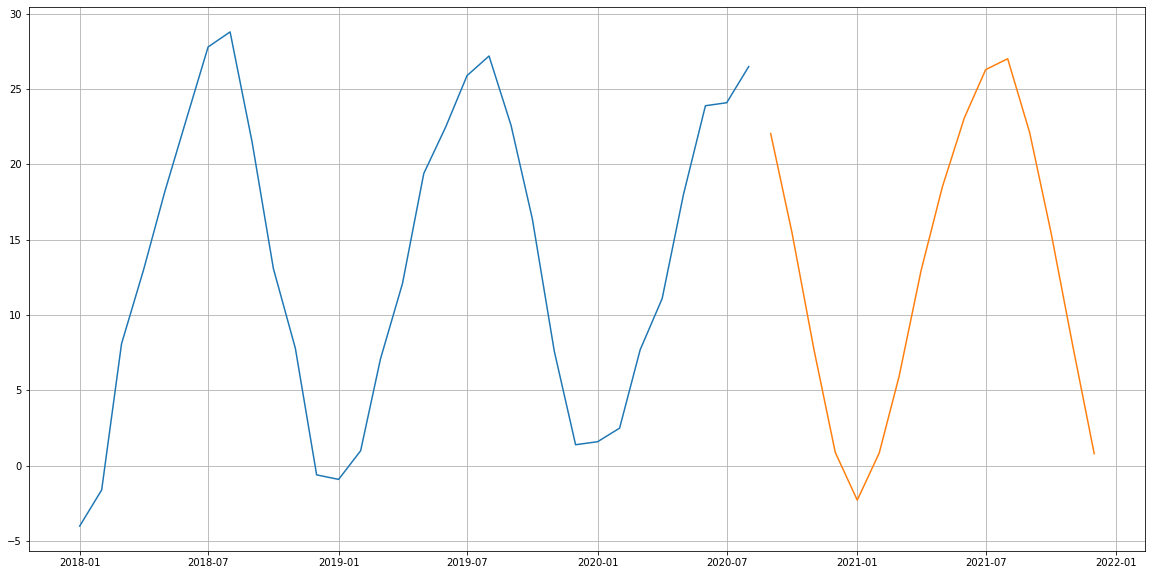

In [39]:
#2.  미래 12개월 날씨 예측하기
import pandas as pd        
gtp=pd.read_csv('/content/drive/MyDrive/gtp_1.csv')

pf = gtp.iloc[:,2:4]
pf.columns=['ds','y']
pf['ds']=pd.to_datetime(pf['ds'])
pf=pf.dropna()

from fbprophet import Prophet                
model = Prophet()                                         

model.fit(pf)    #전체데이터(1342개)로 학습train하여 미래 12개월 날씨 예측하기
term=model.make_future_dataframe(periods=12, freq='MS')  
prediction=model.predict(term)    

predS=prediction[['ds', 'yhat']]  
predIDX=predS.set_index('ds')
pfIDX=pf.set_index('ds')

# 예측 결과 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(pfIDX['2018-01-01':'2020-08-01'])
plt.plot(predIDX['2020-09-01':])
plt.grid(True)
plt.show()
